In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./train_data.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop("Id", axis=1)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


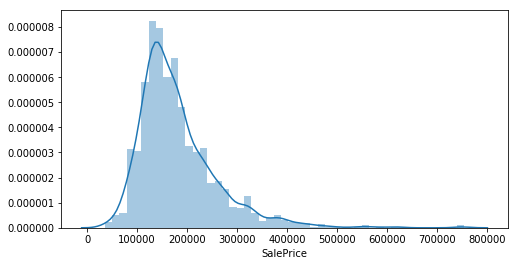

In [5]:
plt.figure(figsize=(8, 4))
sns.distplot(df['SalePrice'])
plt.show()

In [6]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [42]:
corr = df.corr()
corr_columns = corr['SalePrice'].sort_values(ascending=False).head(10)
corr = df[corr_columns.index].corr()

print(corr_columns)

SalePrice       1.000000
OverallQual     0.800858
GrLivArea       0.720516
GarageCars      0.649256
TotalBsmtSF     0.646584
GarageArea      0.636964
1stFlrSF        0.625235
FullBath        0.559048
TotRmsAbvGrd    0.537462
YearBuilt       0.535279
Name: SalePrice, dtype: float64


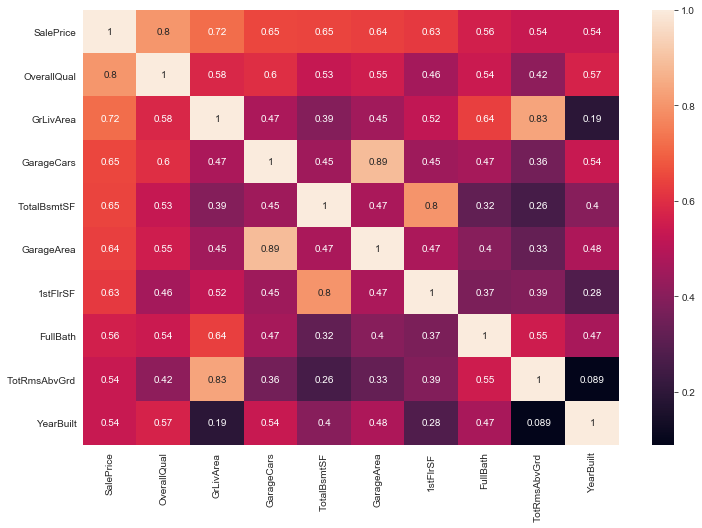

In [54]:
plt.figure(figsize=(12, 8))
mask = np.zeros_like(corr)

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True)
    plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


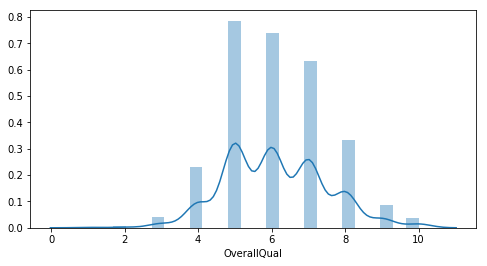

In [11]:
plt.figure(figsize=(8, 4))
sns.distplot(df['OverallQual'])
plt.show()

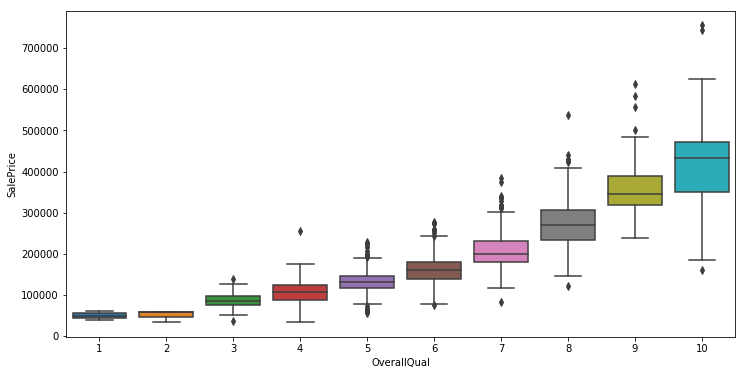

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(df['OverallQual'], df['SalePrice'])
plt.show()

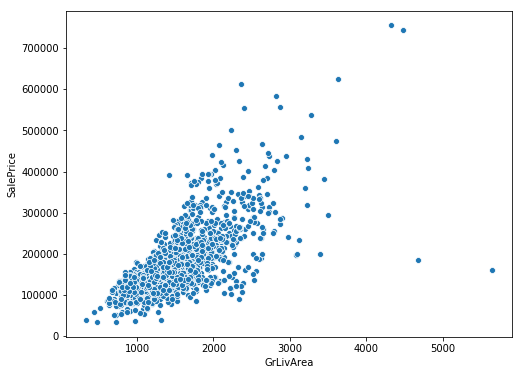

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df['GrLivArea'], df['SalePrice'])
plt.show()

In [14]:
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 400000)].index)

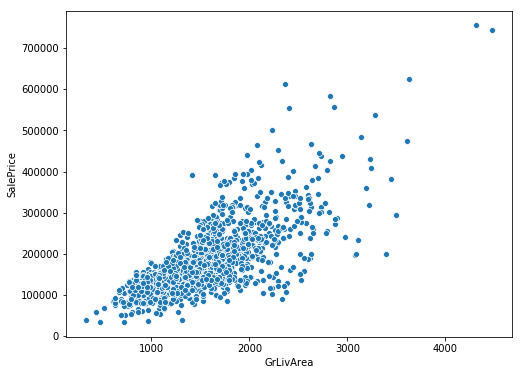

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df['GrLivArea'], df['SalePrice'])
plt.show()

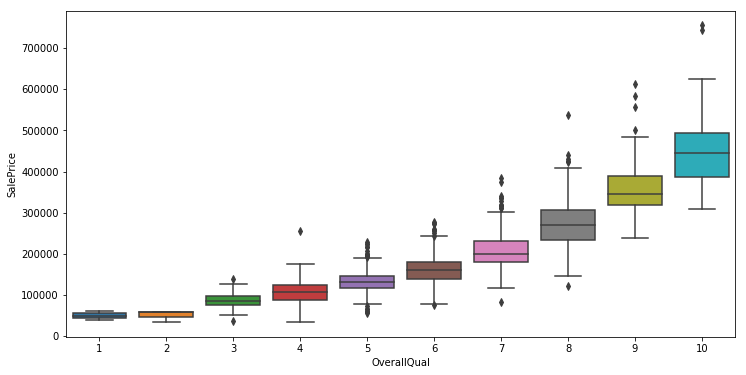

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(df['OverallQual'], df['SalePrice'])
plt.show()

In [17]:
df[(df['OverallQual'] > 9) & (df['SalePrice'] > 650000)][['OverallQual', 'SalePrice', 'GrLivArea']]

,OverallQual,SalePrice,GrLivArea
691,10,755000,4316
1182,10,745000,4476


In [18]:
df = df.drop(df[(df['OverallQual'] > 9) & (df['SalePrice'] > 650000)].index)

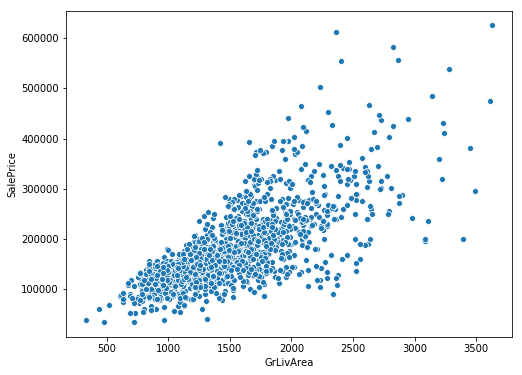

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df['GrLivArea'], df['SalePrice'])
plt.show()

In [43]:
corr

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.800858,0.720516,0.649256,0.646584,0.636964,0.625235,0.559048,0.537462,0.535279
OverallQual,0.800858,1.000000,0.583519,0.598739,0.532666,0.554905,0.462042,0.543791,0.415834,0.571712
GrLivArea,0.720516,0.583519,1.000000,0.474058,0.394829,0.454512,0.522920,0.635161,0.833979,0.192645
GarageCars,0.649256,0.598739,0.474058,1.000000,0.448606,0.886882,0.445861,0.465325,0.358069,0.536749
TotalBsmtSF,0.646584,0.532666,0.394829,0.448606,1.000000,0.472003,0.800759,0.319778,0.259133,0.399867
GarageArea,0.636964,0.554905,0.454512,0.886882,0.472003,1.000000,0.474246,0.400780,0.325467,0.477311
1stFlrSF,0.625235,0.462042,0.522920,0.445861,0.800759,0.474246,1.000000,0.374631,0.390639,0.279929
FullBath,0.559048,0.543791,0.635161,0.465325,0.319778,0.400780,0.374631,1.000000,0.549625,0.466710
TotRmsAbvGrd,0.537462,0.415834,0.833979,0.358069,0.259133,0.325467,0.390639,0.549625,1.000000,0.089207
YearBuilt,0.535279,0.571712,0.192645,0.536749,0.399867,0.477311,0.279929,0.466710,0.089207,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
sns.catplot(x="TotRmsAbvGrd", y="GrLivArea", hue='SalePrice',data=df);
plt.show()